In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Activation, BatchNormalization, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist, cifar10 # 灰階圖資

In [2]:
# global setting
EPOCHS = 30
IMG_SHAPE =(32,32,3)
CLS = 10
BSIZE = 256
LEARN_RATE = 0.001
L2 = 0.005

In [3]:
path = 'mnist.npz'
with np.load(path, allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

In [4]:
# Translation of data  
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')  
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
# Standardize feature data  
x_train = x_train / 255  
x_test = x_test /255  

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
# # Standardization
# x_train = x_train.astype('float') / 255.0
# x_test = x_test.astype('float')  / 255.0

# # 將二維的 28*28 的資料拉直 變成 784  (reshape)
# print(f'Before reshape {x_train.shape}')
# x_train = x_train.reshape(60000,28*28)
# print(f'After reshape {x_train.shape}')
# x_test=x_test.reshape(x_test.shape[0],-1) # -1 請 python 幫你計算 I don't care
# print(f'After reshape {x_test.shape}')

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"y_train : {y_train}")
print(f"y_test : {y_test}")

<img src="./image/MNIST.webp" width = 600px>

In [17]:
model2 = Sequential()

# Create CN layer 1  
model2.add(Conv2D(filters =16, 
                  kernel_size=(3,3),
                  padding = 'same', 
                  input_shape=(28,28,1), 
                  activation='relu',
                  name = 'conv2d_1'))
# Create Max-Pool 1  
model2.add(MaxPooling2D(pool_size=(2,2), name = 'maxpool2d_1'))

# Create CN layer 2  
model2.add(Conv2D(filters = 32,
                  kernel_size=(3,3),
                  padding='same',  
                  input_shape=(28,28,1),  
                  activation='relu',
                  name = 'conv2d_2'))
# Create Max-Pool 2  
model2.add(MaxPooling2D(pool_size=(2,2), name = 'maxpool2d_2'))

# Add Dropout layer  
model2.add(Dropout(0.25, name = 'dropout_1'))

# Flattern  32 x 7 x 7 = 1568
model2.add(Flatten(name = 'flatten_1'))

# Create Hidden layer
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5, name = 'dropout_2'))
# Create Output layer (since its a multiclassification, we use softmax)
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 14, 14, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 7, 7, 32)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [18]:
# compile
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h2 = model2.fit(x = x_train, 
                y = y_train, validation_split=0.2,
                batch_size = 300, epochs=15, verbose=1)

Epoch 1/15
160/160 [==============================] - 4s 25ms/step - loss: 0.5635 - accuracy: 0.8232 - val_loss: 0.1352 - val_accuracy: 0.9609
Epoch 2/15
160/160 [==============================] - 4s 25ms/step - loss: 0.1748 - accuracy: 0.9466 - val_loss: 0.0824 - val_accuracy: 0.9756
Epoch 3/15
160/160 [==============================] - 4s 23ms/step - loss: 0.1292 - accuracy: 0.9607 - val_loss: 0.0630 - val_accuracy: 0.9822
Epoch 4/15
160/160 [==============================] - 4s 23ms/step - loss: 0.1053 - accuracy: 0.9679 - val_loss: 0.0532 - val_accuracy: 0.9849
Epoch 5/15
160/160 [==============================] - 4s 24ms/step - loss: 0.0904 - accuracy: 0.9727 - val_loss: 0.0480 - val_accuracy: 0.9862
Epoch 6/15
160/160 [==============================] - 4s 25ms/step - loss: 0.0786 - accuracy: 0.9767 - val_loss: 0.0422 - val_accuracy: 0.9877
Epoch 7/15
160/160 [==============================] - 4s 24ms/step - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.0408 - val_accuracy: 0.9882

<Axes: >

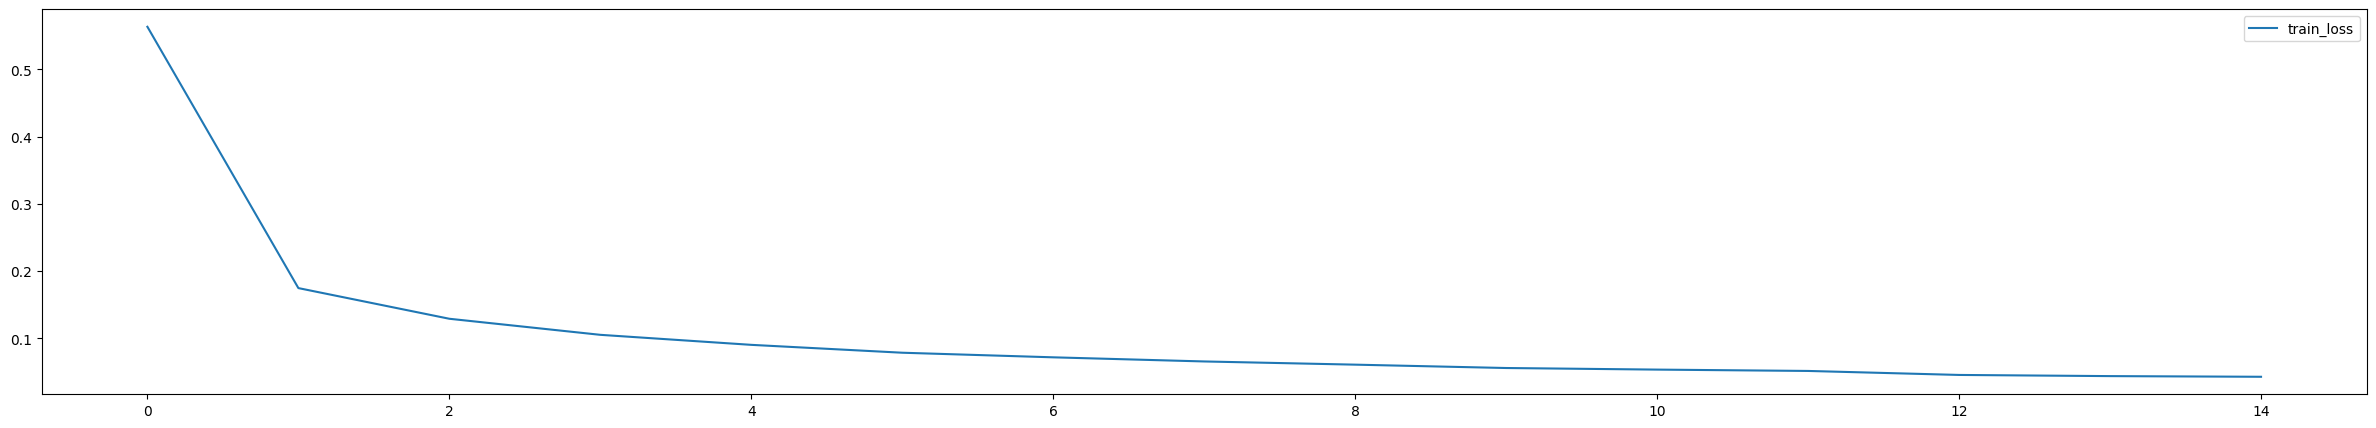

In [19]:
plt.figure(figsize=(30,5))
sns.lineplot(x=range(15), y=h2.history['loss'], label='train_loss')

##### Evaluate the results

In [20]:
scores = model2.evaluate(x_train, y_train)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0185 - accuracy: 0.9941
	[Info] Accuracy of testing data = 99.4%


##### Predict the x_train

In [27]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

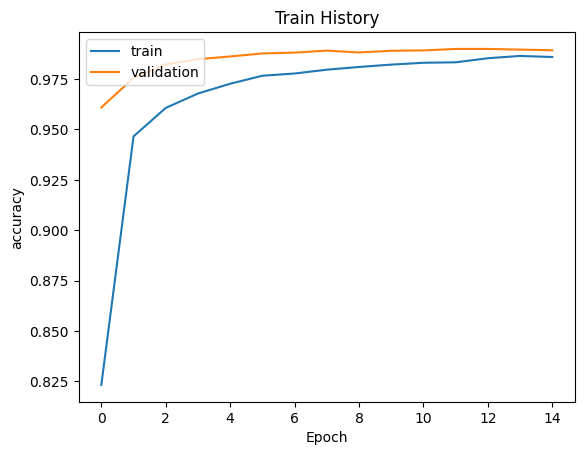

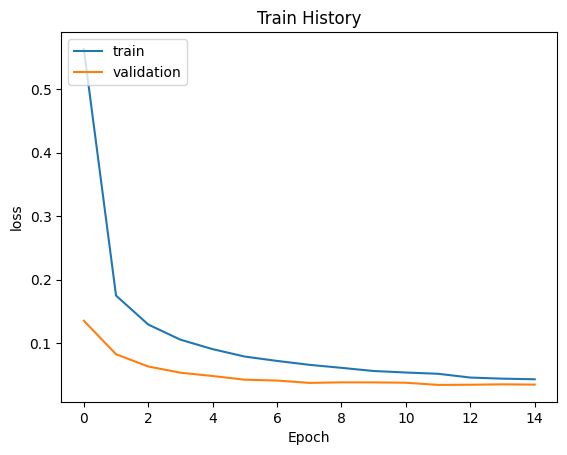

In [28]:
#使用函數 show_train_history 顯示 accuracy 在 train 與 evaluation 的差異與 loss 在 train 與 evaluation 的差異如下:
show_train_history(h2,'accuracy','val_accuracy')
show_train_history(h2, 'loss', 'val_loss')

In [29]:
print("[Info] Making prediction of x_train")  
prediction = model2.predict(x_train)# Making prediction and save result to prediction  
prediction = np.argmax(prediction,axis=1)
print()  
print(f"[Info] Show 10 prediction result (From 240): {prediction[240:250]}\n")  

[Info] Making prediction of x_train
1875/1875 [==============================] - 3s 2ms/step

[Info] Show 10 prediction result (From 240): [8 6 3 7 5 8 0 9 1 0]



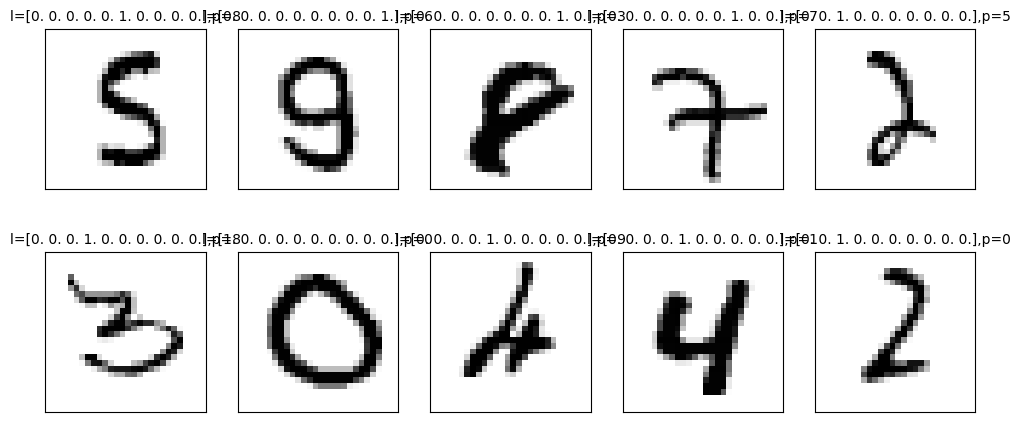

In [30]:
plot_images_labels_predict(x_test, y_test, prediction, idx=240)